In [10]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# 加载数据集
def load_data(data_path):
    points = np.loadtxt(data_path)
    return points

In [12]:
data = load_data('../know_user_kmeans.txt')
print(data.shape)

(112, 4163)


In [13]:
# 使用PCA进行降维处理。从1000维降至2维。
pca = PCA(n_components=20)
data_PCA = pca.fit_transform(data)

In [14]:
print(pca.explained_variance_ratio_)

[0.22333487 0.09221099 0.05970155 0.03540281 0.03146342 0.02851497
 0.02633326 0.0243483  0.02181987 0.02016378 0.01969075 0.0186252
 0.01699796 0.01539639 0.01503941 0.01442148 0.0131639  0.01201368
 0.01170902 0.01101955]


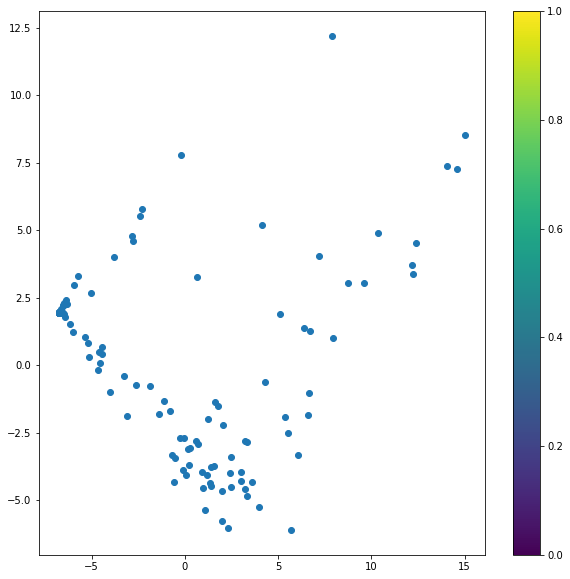

In [15]:
plt.figure(figsize=(10, 10))
plt.plot(2)
plt.scatter(data_PCA[:, 0], data_PCA[:, 1])
plt.colorbar()#使用这一句就可以分辨出，颜色对应的类了！神奇啊。
plt.show()

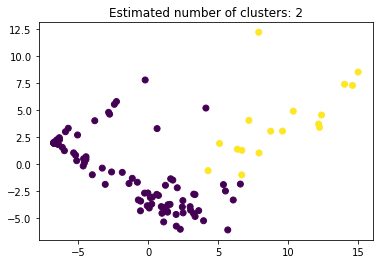

In [16]:
from sklearn.cluster import Birch
y_pred = Birch(n_clusters = 2,threshold = 0.3, branching_factor = 20).fit_predict(data_PCA)
plt.scatter(data_PCA[:, 0], data_PCA[:, 1], c=y_pred)
plt.title('Estimated number of clusters: %d' % len(set(y_pred)))
plt.savefig('img/PCA_BIRCH.svg',dpi=1000) #指定分辨率保存
plt.show()

In [17]:
# 评价
from evaluation import E

e = E(data, y_pred)

CH: 18.126844459516978
DBI: 2.0075980536951628


In [9]:
def cal_sp(data, predict):
    x_count = 0
    y_count = 0
    x = 0
    y = 0
    for i in range(len(predict)):
        if predict[i] == 0:
            x_count += 1
            x += data[i]
        elif predict[i] == 1:
            y_count += 1
            y += data[i]
    print(x/x_count)
    print(y/y_count)
    
        
    for i in range(len(predict)):
        cp_x = 0
        cp_y = 0
        if predict[i] == 0:
             cp_x += (data[i] - x)
        cp_x = cp_x/x_count
        if predict[i] == 1:
            cp_y += (data[i] - y)
        cp_y = cp_y/y_count
        cp = (cp_x + cp_y).sum()/2
    print('cp',cp)
    print('sp',((x/x_count-y/y_count)**2).sum())    
cal_sp(data_PCA, y_pred)

[-1.69805985 -0.69321772  0.35607266  0.02304869 -0.10408973 -0.02741377
  0.00361931 -0.08194837 -0.07527543  0.04218084  0.02270575 -0.03682112
  0.02540655  0.00709474  0.0141933   0.00315503 -0.03849028  0.06367722
 -0.07182297 -0.04369038]
[ 9.48915796  3.87386372 -1.98981781 -0.1288015   0.58167792  0.15319458
 -0.02022554  0.45794675  0.42065683 -0.23571648 -0.12688509  0.20576509
 -0.14197779 -0.03964708 -0.07931547 -0.01763108  0.21509275 -0.35584332
  0.40136366  0.24415214]
cp 1.1297340178805875
sp 153.32412790085507
